In [164]:
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from typing import List

## Clean up

We will read the CSV file and then find all the hashtags. At the same time we will also drop all the unwanted columns.

In [12]:
df = pd.read_csv('../data/tweets.csv')

df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   author            52542 non-null  object 
 1   content           52542 non-null  object 
 2   country           36 non-null     object 
 3   date_time         52542 non-null  object 
 4   id                52542 non-null  float64
 5   language          52542 non-null  object 
 6   latitude          1 non-null      float64
 7   longitude         1 non-null      float64
 8   number_of_likes   52542 non-null  int64  
 9   number_of_shares  52542 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 4.0+ MB


From this we can see that the country, longitude and latitude are null. Hence, we will drop these columns.

In [14]:
df.drop(columns=['country', 'latitude', 'longitude'], inplace=True)

verify our actions

In [18]:
df.head()

,author,content,date_time,id,language,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,8.196330e+17,en,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,8.191010e+17,en,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,8.190140e+17,en,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,8.190120e+17,en,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,8.186890e+17,en,17620,4655


We can also drop id column as it isn't serving any purpose in our case.

In [19]:
df.drop(columns='id', inplace=True)

In [20]:
df.head()

,author,content,date_time,language,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,en,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,en,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,en,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,en,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,en,17620,4655


Now lets assign correct dtypes to author

In [21]:
df['author'] = df.author.astype('category')

Converting date time to Year

In [22]:
df['date_time'] = pd.to_datetime(df.date_time)

In [23]:
df['year'] = df.date_time.dt.year

In [69]:
df_only_2016 = df[df['year'] == 2016].copy()

In [70]:
df_only_2016

,author,content,date_time,language,number_of_likes,number_of_shares,year
9,katyperry,sisters. https://t.co/5ZE21x2aNk,2016-12-27 04:04:00,en,9324,2637,2016
10,katyperry,Happy Holidays! Sending love and light to ever...,2016-12-25 20:35:00,en,23205,7419,2016
11,katyperry,"Damn, it's hard to wrap presents when you're d...",2016-12-25 05:45:00,en,20410,5042,2016
12,katyperry,When my whole fam tryna have a peaceful holida...,2016-12-24 16:26:00,en,8608,2183,2016
13,katyperry,When your holiday shopping is woke af ❗️blkliv...,2016-12-23 18:42:00,en,6713,1948,2016
...,...,...,...,...,...,...,...
51215,ddlovato,I have the worst headache this morning and I d...,2016-01-01 15:31:00,en,32775,14399,2016
51216,ddlovato,Happy new year everyone 💗🎉💜 #RockinEve #CONFID...,2016-01-01 06:46:00,en,32393,17172,2016
51217,ddlovato,You are the fucking cutest... @WValderrama I c...,2016-01-01 03:58:00,en,19465,9478,2016
51218,ddlovato,That was so fun!!! 😱😍😝,2016-01-01 03:11:00,en,21001,9888,2016


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   author            52542 non-null  category      
 1   content           52542 non-null  object        
 2   date_time         52542 non-null  datetime64[ns]
 3   language          52542 non-null  object        
 4   number_of_likes   52542 non-null  int64         
 5   number_of_shares  52542 non-null  int64         
 6   year              52542 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3), object(2)
memory usage: 2.5+ MB


## Hashtag discovery

In this step we will find all the hashtags used in the text of 52542 rows.

In [72]:
just_content = df_only_2016.content

In [73]:
len(just_content)

19107

In [74]:
just_content.head()

9                      sisters. https://t.co/5ZE21x2aNk
10    Happy Holidays! Sending love and light to ever...
11    Damn, it's hard to wrap presents when you're d...
12    When my whole fam tryna have a peaceful holida...
13    When your holiday shopping is woke af ❗️blkliv...
Name: content, dtype: object

In [75]:
type(just_content)

pandas.core.series.Series

In [76]:
hashtags = {}
count = 0
def get_hashtag(series):
    global count
    regex = r'#\w+'
    results = re.findall(regex, series.content)
    for result in results:
        year = series.year
        if result not in hashtags:
            hashtags[result] = {'index': [count], 'year': [year]}
        else:
            hashtags[result]['index'].append(count)
            hashtags[result]['year'].append(year)
    count += 1

In [77]:
df_only_2016.apply(get_hashtag, axis=1)

9        None
10       None
11       None
12       None
13       None
         ... 
51215    None
51216    None
51217    None
51218    None
51219    None
Length: 19107, dtype: object

In [78]:
df_only_2016['date_time'] = df_only_2016.date_time.dt.date

In [79]:
df_only_2016

,author,content,date_time,language,number_of_likes,number_of_shares,year
9,katyperry,sisters. https://t.co/5ZE21x2aNk,2016-12-27,en,9324,2637,2016
10,katyperry,Happy Holidays! Sending love and light to ever...,2016-12-25,en,23205,7419,2016
11,katyperry,"Damn, it's hard to wrap presents when you're d...",2016-12-25,en,20410,5042,2016
12,katyperry,When my whole fam tryna have a peaceful holida...,2016-12-24,en,8608,2183,2016
13,katyperry,When your holiday shopping is woke af ❗️blkliv...,2016-12-23,en,6713,1948,2016
...,...,...,...,...,...,...,...
51215,ddlovato,I have the worst headache this morning and I d...,2016-01-01,en,32775,14399,2016
51216,ddlovato,Happy new year everyone 💗🎉💜 #RockinEve #CONFID...,2016-01-01,en,32393,17172,2016
51217,ddlovato,You are the fucking cutest... @WValderrama I c...,2016-01-01,en,19465,9478,2016
51218,ddlovato,That was so fun!!! 😱😍😝,2016-01-01,en,21001,9888,2016


In [80]:
hashtags

{'#jenniferholliday': {'index': [19], 'year': [2016]},
 '#Thanksgiving': {'index': [20, 21], 'year': [2016, 2016]},
 '#IStandWithStandingRock': {'index': [20], 'year': [2016]},
 '#thanksgivingdayclapback': {'index': [24], 'year': [2016]},
 '#LOVETRUMPSHATE': {'index': [41], 'year': [2016]},
 '#Yeson64': {'index': [49], 'year': [2016]},
 '#HERstory': {'index': [54], 'year': [2016]},
 '#november8th': {'index': [54], 'year': [2016]},
 '#LoveTrumpsHate': {'index': [58, 5237, 5239], 'year': [2016, 2016, 2016]},
 '#IMWITHME': {'index': [68], 'year': [2016]},
 '#childrenfirst': {'index': [72], 'year': [2016]},
 '#debates': {'index': [114,
   133,
   136,
   156,
   166,
   170,
   179,
   216,
   221,
   224,
   228,
   6466,
   8009,
   8039,
   8040,
   8041,
   8042,
   8043,
   8044,
   8056,
   8057,
   8058,
   8075,
   8078,
   8079,
   8080,
   8081,
   8082,
   8083,
   8086],
  'year': [2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
 

In [81]:
sorted_hashtags = sorted(hashtags, key=lambda items: len(hashtags[items].get('index')), reverse=True)

In [82]:
sorted_hashtags

['#FallonTonight',
 '#DailyFluff',
 '#LoveTwitter',
 '#DoYourJob',
 '#voteIRL',
 '#CantStopTheFeeling',
 '#ActOnClimate',
 '#TheWeekOnInstagram',
 '#TBT',
 '#YouTubeRewind',
 '#TNF',
 '#JOANNE',
 '#SOTU',
 '#YTRedOriginals',
 '#Chantaje',
 '#PurposeTour',
 '#WeeklyFluff',
 '#PieceOfMe',
 '#VMAs',
 '#TwitterTips',
 '#HondaCivicTour',
 '#Rio2016',
 '#SCOTUS',
 '#ThankYouNoteFriday',
 '#LaughDancePartner',
 '#1',
 '#BoomerangOfTheWeek',
 '#ProudToBe',
 '#LaBicicleta',
 '#DangerousWoman',
 '#debates',
 '#YouTubeMusic',
 '#FindingDory',
 '#GetCovered',
 '#EscapeTheNight',
 '#WWIM14',
 '#LifeOnEarthWWIM13',
 '#ThisHappened',
 '#myinstagramlogo',
 '#PrankAcademy',
 '#TravelTuesday',
 '#company',
 '#KeysOfChristmas',
 '#IntoYou',
 '#LoveIsLove',
 '#ANTI',
 '#Oscars',
 '#DreamWorksTrolls',
 '#Zootopia',
 '#Obamacare',
 '#FoursomeShow',
 '#FOTLD',
 '#GloryStreamingParty',
 '#FutureNow',
 '#ColdWater',
 '#Glory',
 '#RLBuddySystem',
 '#PERFECTILLUSION',
 '#ElectionNight',
 '#KUWTK',
 '#MakeMe',
 '

In [83]:
sorted_hashtags[:5]

['#FallonTonight', '#DailyFluff', '#LoveTwitter', '#DoYourJob', '#voteIRL']

In [91]:
df_sub_2016 = df_only_2016.iloc[hashtags['#FallonTonight']['index']].copy()

In [92]:
df_sub_2016

,author,content,date_time,language,number_of_likes,number_of_shares,year
14517,YouTube,"Listen to your man, Bareezus preach. https://t...",2016-10-06,en,1239,273,2016
39014,jimmyfallon,Jim Parsons and I play 5-Second Summaries htt...,2016-12-23,en,1593,383,2016
39015,jimmyfallon,"Tonight: Adam Driver, @rhettandlink, music fro...",2016-12-23,en,2597,545,2016
39017,jimmyfallon,Best Friends Challenge with @violadavis https:...,2016-12-22,en,1018,147,2016
39022,jimmyfallon,"Tonight's show: @violadavis, @nickkroll and Ch...",2016-12-21,en,999,160,2016
...,...,...,...,...,...,...,...
39701,jimmyfallon,Preview of our show tonight: https://t.co/6WH6...,2016-06-01,en,1456,352,2016
39702,jimmyfallon,Tonight: Playing The Whisper Challenge with Kr...,2016-05-01,en,2780,709,2016
39705,jimmyfallon,We're back with new episodes!! Tonight: @TheSl...,2016-04-01,en,4189,1063,2016
42819,ArianaGrande,You are forever my favorite @jimmyfallon #Into...,2016-07-14,en,31298,11333,2016


In [95]:
df_sub_2016['date_time'] = pd.to_datetime(df_sub_2016['date_time'])

C:\Users\aksha\AppData\Local\Temp\ipykernel_16852\2702740761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_2016['date_time'] = pd.to_datetime(df_sub_2016['date_time'])


In [96]:
df_sub_2016['month'] = df_sub_2016.date_time.dt.month

C:\Users\aksha\AppData\Local\Temp\ipykernel_16852\3079635222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_2016['month'] = df_sub_2016.date_time.dt.month


In [120]:
df_sub_2016.groupby('month').nunique()

,author,content,date_time,language,number_of_likes,number_of_shares,year
month,,,,,,,
1,1,27,18,2,27,27,1
2,1,25,12,1,25,24,1
3,1,34,20,2,34,34,1
4,1,26,16,1,26,26,1
5,1,36,18,2,35,36,1
6,1,31,16,1,31,30,1
7,2,41,20,1,41,38,1
8,1,30,16,1,30,30,1
9,1,29,18,1,29,27,1


In [144]:
temp = df_sub_2016.groupby('month').count().reset_index().iloc[:, [0, 1]]

In [145]:
temp

,month,author
0,1,27
1,2,25
2,3,34
3,4,26
4,5,36
5,6,31
6,7,41
7,8,30
8,9,29
9,10,26


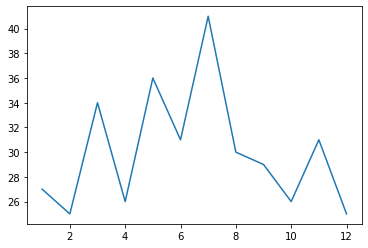

In [109]:
plt.plot(temp.month, temp.author)

In [116]:
peaks = find_peaks(temp.author)

In [118]:
peaks[0]

array([ 2,  4,  6, 10], dtype=int64)

In [174]:
hashtag_peak = dict()
count_iter = 0
for hashtag in hashtags.keys():
    sub_set = df_only_2016.iloc[hashtags[hashtag]['index']].copy()
    sub_set['date_time'] = pd.to_datetime(sub_set.date_time)
    sub_set['month'] = sub_set.date_time.dt.month
    temp = sub_set.groupby('month').count().reset_index().iloc[:, [0, 1]]
    peaks = find_peaks(temp.author)
    if len(peaks[0]) > 0:
        for peak in peaks[0]:
            month = peak + 1
            # content_to_print = f'{hashtag} ({temp.iloc[peak].author})' if count_iter % 3 == 0 else f'{hashtag} ({temp.iloc[peak].author})'
            if month not in hashtag_peak:
                hashtag_peak[month] = [{'count': temp.iloc[peak].author, 'hashtag': hashtag}]
                # hashtag_peak[month] = [content_to_print]
            else:
                hashtag_peak[month].append({'count': temp.iloc[peak].author, 'hashtag': hashtag})
    count_iter += 1


In [175]:
hashtag_peak

{2: [{'count': 2, 'hashtag': '#debates'},
  {'count': 2, 'hashtag': '#ad'},
  {'count': 7, 'hashtag': '#1'},
  {'count': 4, 'hashtag': '#MetGala'},
  {'count': 3, 'hashtag': '#PurposeTour'},
  {'count': 2, 'hashtag': '#KIISJingleBall'},
  {'count': 2, 'hashtag': '#giveback'},
  {'count': 4, 'hashtag': '#iHeartAwards'},
  {'count': 5, 'hashtag': '#PCAs'},
  {'count': 8, 'hashtag': '#DisarmHate'},
  {'count': 9, 'hashtag': '#LoveIsLove'},
  {'count': 5, 'hashtag': '#WearOrange'},
  {'count': 4, 'hashtag': '#Election2016'},
  {'count': 2, 'hashtag': '#FENTYXPUMA'},
  {'count': 3, 'hashtag': '#ANTIWORLDTOUR'},
  {'count': 6, 'hashtag': '#ParanormalActionSquad'},
  {'count': 7, 'hashtag': '#YouTubeMusic'},
  {'count': 12, 'hashtag': '#RLBuddySystem'},
  {'count': 8, 'hashtag': '#YTRedOriginals'},
  {'count': 2, 'hashtag': '#SingleBy30'},
  {'count': 3, 'hashtag': '#StrangerThings'},
  {'count': 2, 'hashtag': '#ThursdayThoughts'},
  {'count': 4, 'hashtag': '#GameLab'},
  {'count': 19, 'hasht

In [179]:
just_month_2 = hashtag_peak[2]

In [189]:
sorted_hashtags_peak = dict()
for month, hashtag_value in hashtag_peak.items():
    sorted_list = sorted(hashtag_value, key=lambda i: i['count'], reverse=True)
    sorted_hashtags_peak[month] = [ f'{sr["hashtag"]} ({sr["count"]})' for sr in sorted_list[:5]]

In [190]:
sorted_hashtags_peak

{2: ['#LifeOnEarthWWIM13 (24)',
  '#DangerousWoman (19)',
  '#MakeMe (15)',
  '#RLBuddySystem (12)',
  '#LaBicicleta (12)'],
 4: ['#CantStopTheFeeling (44)',
  '#VMAs (35)',
  '#ActOnClimate (21)',
  '#YTRedOriginals (20)',
  '#DoYourJob (18)'],
 7: ['#voteIRL (43)',
  '#FallonTonight (41)',
  '#LaughDancePartner (14)',
  '#DoYourJob (13)',
  '#DreamWorksTrolls (8)'],
 10: ['#TheWeekOnInstagram (15)',
  '#1 (9)',
  '#TBT (8)',
  '#BoomerangOfTheWeek (4)'],
 3: ['#FallonTonight (34)',
  '#FOTLD (15)',
  '#PERFECTILLUSION (13)',
  '#BBMAs (12)',
  '#TBT (10)'],
 8: ['#Chantaje (24)',
  '#TheWeekOnInstagram (17)',
  '#YTRedOriginals (16)',
  '#TNF (15)',
  '#ActOnClimate (10)'],
 6: ['#Rio2016 (16)',
  '#ActOnClimate (9)',
  '#YTRedOriginals (5)',
  '#DangerousWoman (5)',
  '#TwitterTips (5)'],
 5: ['#FallonTonight (36)',
  '#DailyFluff (23)',
  '#FindingDory (11)',
  '#YouTubeMusic (11)',
  '#Glory (10)'],
 9: ['#JOANNE (46)',
  '#DoYourJob (20)',
  '#PieceOfMe (6)',
  '#TwitterTips (5)'

In [172]:
def string_formatter(strings_array: List[str], new_line_add: int = 4, sep: str = ',') -> str:
    array_with_new_line = [f'\n{strings_array[i]}' if i % new_line_add == 0 else f'{strings_array[i]}' for i in range(0, len(strings_array)) ]
    return sep.join(array_with_new_line)

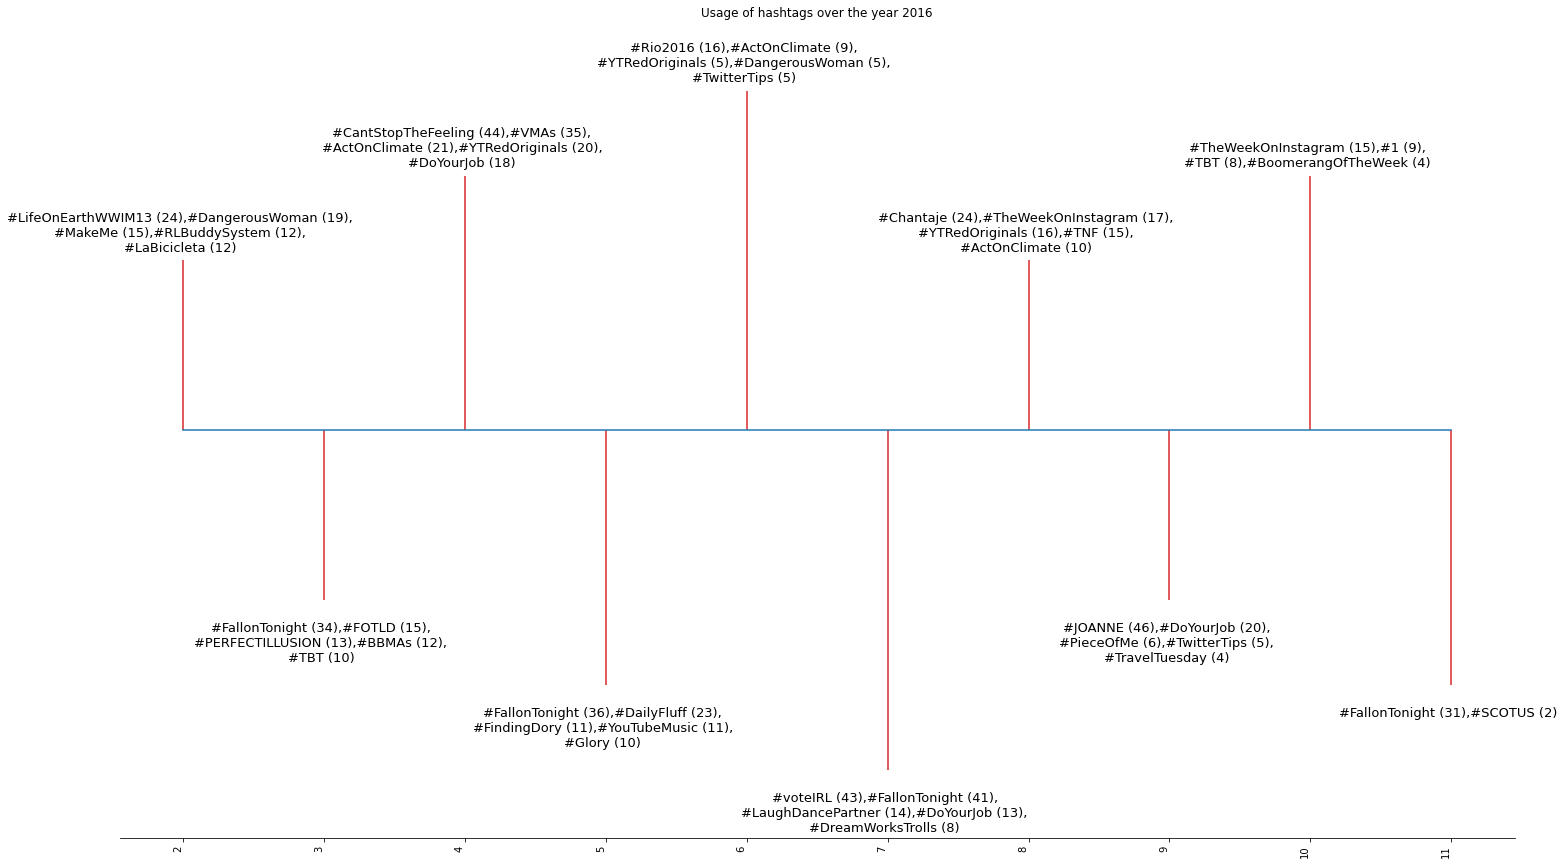

In [192]:
def __draw_hashtag_timeline_peak(months, hashtags_peaks_values):
    unique_values = months

    levels = np.tile([1, -1, 1.5, -1.5, 2, -2],
                     int(np.ceil(len(unique_values) / 6)))[:len(unique_values)]

    marker_size = np.zeros_like(unique_values).astype(float)

    # creating even spaced dots
    x_axis = [x + 3 for x in range(0, len(unique_values))]

    fig, ax = plt.subplots(figsize=(25, 15))
    ax.set(title='Usage of hashtags over the year 2016')

    # the date_test here is the place where the graph should be
    # 0 is the min
    # levels is the maximum here.
    ax.vlines(x_axis, 0, levels, color="tab:red")

    ax.plot(x_axis, np.zeros_like(unique_values))
    # ax.scatter(x_axis, np.zeros_like(unique_values), s=marker_size, edgecolors='k', c='lightgray')
    # plt.legend(['', '', 'Magnitude'])

    for d, lev, events in zip(x_axis, levels, months):
        ax.annotate(f"{string_formatter(hashtags_peaks_values[events], new_line_add=2)}", xy=(d, lev), xytext=(-3, np.sign(lev) * 6), textcoords="offset points",
                     horizontalalignment="center",
                     verticalalignment="bottom" if lev > 0 else "top", wrap=True, fontsize=13)

    ax.set_xticks(x_axis)
    ax.set_xticklabels(unique_values)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
    # ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

    ax.yaxis.set_visible(False)
    ax.spines[["left", "top", "right"]].set_visible(False)

    ax.margins(y=0.1)
    plt.show()

__draw_hashtag_timeline_peak(sorted(list(sorted_hashtags_peak.keys())), sorted_hashtags_peak)

In [150]:
df_peak = pd.DataFrame(hashtag_peak, columns=['Month', 'Events'])

,Month,Events


In [18]:
df_fallon = df.loc[hashtags['#FallonTonight']['index']]

In [19]:
df_fallon

,author,content,date_time,language,number_of_likes,number_of_shares
14517,YouTube,"Listen to your man, Bareezus preach. https://t...",2016-10-06 21:00:00,en,1239,273
23951,jtimberlake,"Oh, stop it. I'm looking at you, Jimmy. #Fallo...",2015-09-14 20:45:00,en,5690,1551
24169,jtimberlake,“@FallonTonight: Jiminy Glick asks Jimmy about...,2014-02-12 07:01:00,en,3499,2739
38991,jimmyfallon,"Tonight: @MichaelKeaton, @ninadobrev, music fr...",2017-01-17 13:47:00,en,184,42
38992,jimmyfallon,.@michaelstrahan and @BryceDHoward take on @qu...,2017-01-17 12:55:00,en,402,60
...,...,...,...,...,...,...
41544,jimmyfallon,“@AmandaPlonka984: @jimmyfallon in class this ...,2014-02-15 00:53:00,en,462,72
41571,jimmyfallon,Feb. 17 - Will Smith and U2. #FallonTonight,2014-02-02 17:21:00,en,1766,660
41774,jimmyfallon,#FallonTonight #Feb17 http://t.co/sQp7yLmMJR,2013-12-18 16:40:00,und,4725,2873
42819,ArianaGrande,You are forever my favorite @jimmyfallon #Into...,2016-07-14 04:56:00,en,31298,11333


In [20]:
df_fallon['date'] = df_fallon.date_time.dt.date

In [21]:
df_fallon['month_year'] = df_fallon.date_time.dt.to_period('M')

In [22]:
df_fallon

,author,content,date_time,language,number_of_likes,number_of_shares,date,month_year
14517,YouTube,"Listen to your man, Bareezus preach. https://t...",2016-10-06 21:00:00,en,1239,273,2016-10-06,2016-10
23951,jtimberlake,"Oh, stop it. I'm looking at you, Jimmy. #Fallo...",2015-09-14 20:45:00,en,5690,1551,2015-09-14,2015-09
24169,jtimberlake,“@FallonTonight: Jiminy Glick asks Jimmy about...,2014-02-12 07:01:00,en,3499,2739,2014-02-12,2014-02
38991,jimmyfallon,"Tonight: @MichaelKeaton, @ninadobrev, music fr...",2017-01-17 13:47:00,en,184,42,2017-01-17,2017-01
38992,jimmyfallon,.@michaelstrahan and @BryceDHoward take on @qu...,2017-01-17 12:55:00,en,402,60,2017-01-17,2017-01
...,...,...,...,...,...,...,...,...
41544,jimmyfallon,“@AmandaPlonka984: @jimmyfallon in class this ...,2014-02-15 00:53:00,en,462,72,2014-02-15,2014-02
41571,jimmyfallon,Feb. 17 - Will Smith and U2. #FallonTonight,2014-02-02 17:21:00,en,1766,660,2014-02-02,2014-02
41774,jimmyfallon,#FallonTonight #Feb17 http://t.co/sQp7yLmMJR,2013-12-18 16:40:00,und,4725,2873,2013-12-18,2013-12
42819,ArianaGrande,You are forever my favorite @jimmyfallon #Into...,2016-07-14 04:56:00,en,31298,11333,2016-07-14,2016-07


In [23]:
df_fallon.groupby('date').count()

,author,content,date_time,language,number_of_likes,number_of_shares,month_year
date,,,,,,,
2013-12-18,1,1,1,1,1,1,1
2014-01-04,2,2,2,2,2,2,2
2014-01-05,1,1,1,1,1,1,1
2014-01-08,5,5,5,5,5,5,5
2014-01-10,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
2017-01-16,1,1,1,1,1,1,1
2017-01-17,2,2,2,2,2,2,2
2017-10-01,1,1,1,1,1,1,1


In [24]:
hashtags

{'#DONTNORMALIZEHATE': {'index': [0], 'year': [2017]},
 '#fourmoreyears': {'index': [5], 'year': [2017]},
 '#jenniferholliday': {'index': [28], 'year': [2016]},
 '#Thanksgiving': {'index': [29, 30, 22415, 22419],
  'year': [2016, 2016, 2015, 2015]},
 '#IStandWithStandingRock': {'index': [29], 'year': [2016]},
 '#thanksgivingdayclapback': {'index': [33], 'year': [2016]},
 '#LOVETRUMPSHATE': {'index': [50], 'year': [2016]},
 '#Yeson64': {'index': [58], 'year': [2016]},
 '#HERstory': {'index': [63], 'year': [2016]},
 '#november8th': {'index': [63], 'year': [2016]},
 '#LoveTrumpsHate': {'index': [67, 15932, 15934], 'year': [2016, 2016, 2016]},
 '#IMWITHME': {'index': [77], 'year': [2016]},
 '#childrenfirst': {'index': [81], 'year': [2016]},
 '#debates': {'index': [123,
   142,
   145,
   165,
   175,
   179,
   188,
   225,
   230,
   233,
   237,
   18779,
   21648,
   21678,
   21679,
   21680,
   21681,
   21682,
   21683,
   21695,
   21696,
   21697,
   21714,
   21717,
   21718,
   2

In [25]:
df_debates = df.loc[hashtags['#debates']['index']]

In [26]:
df_debates.sort_values(by='date_time')

,author,content,date_time,language,number_of_likes,number_of_shares
22884,Twitter,The final debate generated 6.5 million Tweets ...,2012-10-23 03:30:00,en,172,628
21697,Twitter,Streaming LIVE in two hours:\r\n\r\n@timkaine\...,2016-04-10 23:00:00,en,367,150
21696,Twitter,Streaming LIVE:\r\n\r\n@timkaine\r\n#debates \...,2016-05-10 01:04:00,en,504,208
21695,Twitter,"The #debates continue, LIVE on Twitter. \r\n\r...",2016-05-10 02:37:00,en,507,156
21683,Twitter,Tomorrow night: the presidential #debates are ...,2016-08-10 16:15:00,en,1862,763
21682,Twitter,Tonight: the second of the US presidential #de...,2016-09-10 14:50:00,en,5161,3795
21725,Twitter,Watch the US presidential #debates LIVE on Twi...,2016-09-23 17:30:00,en,1258,606
21722,Twitter,Tomorrow night.\r\n\r\nThe US presidential #de...,2016-09-25 14:43:00,en,1167,724
21721,Twitter,Tonight: the first of the US presidential #deb...,2016-09-26 13:20:00,en,2081,1523
21720,Twitter,Streaming LIVE in two hours:\r\n\r\n@HillaryCl...,2016-09-26 23:00:00,en,762,460


In [27]:
df_debates['year'] = df_debates['date_time'].dt.year
df_debates['month'] = df_debates['date_time'].dt.month
df_debates['days'] = df_debates['date_time'].dt.day


In [28]:
df_debates

,author,content,date_time,language,number_of_likes,number_of_shares,year,month,days
123,katyperry,Someone count how many times he is clenching h...,2016-10-20 02:35:00,en,6801,1518,2016,10,20
142,katyperry,YES I LOVE THAT WE ARE GETTING INTO REAL ISSUE...,2016-10-20 01:16:00,en,6024,1454,2016,10,20
145,katyperry,I love when she lays out the rules like the bo...,2016-10-20 01:08:00,en,5896,1472,2016,10,20
165,katyperry,I'm so glad for #earlyvoting #debates,2016-10-10 02:39:00,en,5259,1204,2016,10,10
175,katyperry,I notice these are not built in mics tonight.....,2016-10-10 02:02:00,en,6745,1787,2016,10,10
179,katyperry,RT IF YOU ARE YELLING AT THE TV RIGHT NOW. #de...,2016-10-10 01:45:00,en,14952,9551,2016,10,10
188,katyperry,DON'T SHAKE HIS HAND #debates,2016-10-10 00:55:00,en,9349,2333,2016,10,10
225,katyperry,Sleeping for a week now 👋🏼 #debates,2016-09-27 02:41:00,en,9281,2258,2016,9,27
230,katyperry,This is like watching a frog sitting in water ...,2016-09-27 02:23:00,en,9924,2704,2016,9,27
233,katyperry,". @sallykohn sorry, meditation. I can't even s...",2016-09-27 02:16:00,en,4414,973,2016,9,27


In [29]:
df_debates['days'].nunique()

6

In [30]:
#df_debates.drop(columns=df_debates.columns.difference('date_time', 'content'))
# dir(df_debates.columns)
df_debates.columns.difference(['date_time', 'content'])

Index(['author', 'days', 'language', 'month', 'number_of_likes',
       'number_of_shares', 'year'],
      dtype='object')

In [31]:
df_taylor = df.loc[hashtags['#taylurking']['index']]

In [32]:
df_taylor

,author,content,date_time,language,number_of_likes,number_of_shares
5606,taylorswift13,"In silent screams,\r\nIn wildest dreams,\r\nI ...",2014-03-11 03:54:00,en,11251,3904
5607,taylorswift13,When I was drowning \r\nThat's when I could fi...,2014-03-11 03:50:00,en,10468,3593
5608,taylorswift13,"Oh, you got that James Dean daydream \r\nLook ...",2014-03-11 03:41:00,en,10242,3632
5609,taylorswift13,Look at that face... 😍\r\n\r\n#TS1989 \r\n#tay...,2014-03-11 03:31:00,en,9462,5348
5610,taylorswift13,Saw you there and I thought \r\nOh \r\nMy \r\n...,2014-03-11 03:22:00,en,10014,3474
...,...,...,...,...,...,...
5778,taylorswift13,I cyber-stalk because I care. #taylurking http...,2014-10-27 22:50:00,en,17443,6995
5779,taylorswift13,Just #taylurking around and found these adorab...,2014-10-27 21:44:00,en,12865,5530
5780,taylorswift13,I love the pics you're posting with the Polaro...,2014-10-27 20:38:00,en,13001,5589
5781,taylorswift13,Getting ready for the @iHeartRadio Secret Sess...,2014-10-27 20:31:00,en,12198,5364


In [33]:
df_taylor['year'] = df_taylor['date_time'].dt.year
df_taylor['month'] = df_taylor['date_time'].dt.month
df_taylor['days'] = df_taylor['date_time'].dt.day

In [34]:
df_taylor['days'].nunique()

6

In [35]:
df_taylor.groupby('days').count().index.to_numpy()

array([11, 27, 28, 29, 30, 31], dtype=int64)

In [36]:
import matplotlib.pyplot as plt

In [37]:
unique_values = df_taylor.groupby('days').count().index.to_numpy()
magnitude = df_taylor.groupby('days').count().iloc[:, 1].values

In [42]:
df['year'] = df.date_time.dt.year

df.head()

,author,content,date_time,language,number_of_likes,number_of_shares,year
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,2017-12-01 19:52:00,en,7900,3472,2017
1,katyperry,@barackobama Thank you for your incredible gra...,2017-11-01 08:38:00,en,3689,1380,2017
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,2017-11-01 02:52:00,en,10341,2387,2017
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,2017-11-01 02:44:00,en,10774,2458,2017
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,2017-10-01 05:22:00,en,17620,4655,2017


In [43]:
just_content.shape

(52542,)

In [44]:
hashtag_year = dict()
count_1 = 0
def get_hashtag_year(series):
    global count_1
    regex = r'#\w+'
    results = re.findall(regex, series)
    for result in results:
        hashtag_count = 1
        year = df.date_time[count_1].year
        if year not in hashtag_year:
            hashtag_year[year] = {result: {"count": hashtag_count, "index":[count_1]}}
        else:
            if result not in hashtag_year[year]:
                hashtag_year[year].update({result: {"count": hashtag_count, "index":[count_1]}})
                continue
            hashtag_year[year][result]['index'].append(count_1)
            hashtag_year[year][result]['count'] = hashtag_year[year][result]['count'] + 1
    count_1 += 1

In [45]:
just_content.map(get_hashtag_year)

0        None
1        None
2        None
3        None
4        None
         ... 
52537    None
52538    None
52539    None
52540    None
52541    None
Name: content, Length: 52542, dtype: object

In [46]:
hashtag_year

{2017: {'#DONTNORMALIZEHATE': {'count': 1, 'index': [0]},
  '#fourmoreyears': {'count': 1, 'index': [5]},
  '#10yearsofkidrauhl': {'count': 1, 'index': [2925]},
  '#NBAVote': {'count': 2, 'index': [2929, 23541]},
  '#retweettovote': {'count': 1, 'index': [2929]},
  '#LiveByNight': {'count': 1, 'index': [4924]},
  '#FarewellAddress': {'count': 1, 'index': [6953]},
  '#ObamaFarewell': {'count': 3, 'index': [6953, 18175, 21313]},
  '#RiRiKiss': {'count': 1, 'index': [9816]},
  '#FENTYXPUMA': {'count': 1, 'index': [9817]},
  '#Sundance': {'count': 4, 'index': [12696, 12706, 12708, 12710]},
  '#ThisIsEverythingDoc': {'count': 3, 'index': [12696, 12704, 12747]},
  '#YouTubeRed': {'count': 2, 'index': [12704, 12706]},
  '#SquadWarsShow': {'count': 1, 'index': [12736]},
  '#FoursomeShow': {'count': 3, 'index': [12745, 12797, 12859]},
  '#MindFieldShow': {'count': 2, 'index': [12748, 12801]},
  '#NationalGlutenFreeDay': {'count': 1, 'index': [12775]},
  '#PartyMonster': {'count': 1, 'index': [1

In [47]:
df_year_hashtag = pd.DataFrame(hashtag_year)

In [48]:
df_year_hashtag

,2017,2016,2015,2014,2013,2012,2011,2010,2009
#DONTNORMALIZEHATE,"{'count': 1, 'index': [0]}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#fourmoreyears,"{'count': 1, 'index': [5]}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#10yearsofkidrauhl,"{'count': 1, 'index': [2925]}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#NBAVote,"{'count': 2, 'index': [2929, 23541]}","{'count': 2, 'index': [3449, 3450]}",NaN,NaN,NaN,NaN,NaN,NaN,NaN
#retweettovote,"{'count': 1, 'index': [2929]}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
#interviewselena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'count': 2, 'index': [37038, 37055]}",NaN
#selenagomez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'count': 4, 'index': [37043, 37046, 37068, 37...",NaN
#ROUNDANDROUND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'count': 3, 'index': [37130, 37131, 37132]}",NaN
#roundandround,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'count': 4, 'index': [37133, 37135, 37137, 37...",NaN


In [49]:
count_2017_only = [c['count'] for k, c in hashtag_year[2015].items()]

In [50]:
count_2017_only_np = np.array(count_2017_only)

In [51]:
count_2017_quantile = np.quantile(count_2017_only_np, [0.95])

In [52]:
count_2017_quantile

array([7.4])

In [53]:
index_to_be_displayed_2017

NameError: name 'index_to_be_displayed_2017' is not defined

In [54]:
[f"{k} {c}" for k, (C ,c) in enumerate(hashtag_year[2017].items())]

["0 {'count': 1, 'index': [0]}",
 "1 {'count': 1, 'index': [5]}",
 "2 {'count': 1, 'index': [2925]}",
 "3 {'count': 2, 'index': [2929, 23541]}",
 "4 {'count': 1, 'index': [2929]}",
 "5 {'count': 1, 'index': [4924]}",
 "6 {'count': 1, 'index': [6953]}",
 "7 {'count': 3, 'index': [6953, 18175, 21313]}",
 "8 {'count': 1, 'index': [9816]}",
 "9 {'count': 1, 'index': [9817]}",
 "10 {'count': 4, 'index': [12696, 12706, 12708, 12710]}",
 "11 {'count': 3, 'index': [12696, 12704, 12747]}",
 "12 {'count': 2, 'index': [12704, 12706]}",
 "13 {'count': 1, 'index': [12736]}",
 "14 {'count': 3, 'index': [12745, 12797, 12859]}",
 "15 {'count': 2, 'index': [12748, 12801]}",
 "16 {'count': 1, 'index': [12775]}",
 "17 {'count': 1, 'index': [12776]}",
 "18 {'count': 1, 'index': [12778]}",
 "19 {'count': 1, 'index': [12791]}",
 "20 {'count': 1, 'index': [12799]}",
 "21 {'count': 1, 'index': [12800]}",
 "22 {'count': 1, 'index': [12801]}",
 "23 {'count': 1, 'index': [12802]}",
 "24 {'count': 1, 'index': [12

In [55]:
timeline_dict = []
def process_year_timeline():
    for year, value in hashtag_year.items():
        quantile_of_count = np.quantile(np.array([c['count'] for k, c in hashtag_year[year].items()]), [0.99])
        tags_with_count_more_than_quantile = \
            [f"{k} ({c['count']})" for i, (k, c) in enumerate(hashtag_year[year].items()) if c['count'] > quantile_of_count]
        tags_with_line_break = [f"\n{tag}" if i % 3 == 0 and i != 0 else tag for i, tag in enumerate(tags_with_count_more_than_quantile)]
        timeline_dict.append({'date': year, 'event': tags_with_line_break})


In [56]:
process_year_timeline()

In [57]:
timeline_dict

[{'date': 2017, 'event': ['#GoldenGlobes (14)', '#FallonTonight (12)']},
 {'date': 2016,
  'event': ['#TBT (87)',
   '#Rio2016 (41)',
   '#PurposeTour (51)',
   '\n#ActOnClimate (95)',
   '#DoYourJob (147)',
   '#SCOTUS (40)',
   '\n#SOTU (68)',
   '#VMAs (43)',
   '#YouTubeRewind (74)',
   '\n#voteIRL (97)',
   '#YTRedOriginals (68)',
   '#FallonTonight (361)',
   '\n#JOANNE (69)',
   '#LoveTwitter (166)',
   '#LaughDancePartner (36)',
   '\n#TNF (73)',
   '#TwitterTips (42)',
   '#CantStopTheFeeling (96)',
   '\n#PieceOfMe (46)',
   '#ThankYouNoteFriday (38)',
   '#Chantaje (58)',
   '\n#DailyFluff (215)',
   '#WeeklyFluff (47)',
   '#TheWeekOnInstagram (95)',
   '\n#HondaCivicTour (42)']},
 {'date': 2015,
  'event': ['#TBT (86)',
   '#PURPOSE (63)',
   '#1 (33)',
   '\n#WhatDoYouMean (62)',
   '#purpose (35)',
   '#whatdoyoumean (36)',
   '\n#SOTU (50)',
   '#ActOnClimate (132)',
   '#GetCovered (45)',
   '\n#Obamacare (37)',
   '#LeadOnTrade (36)',
   '#IranDeal (52)',
   '\n#YouTu

In [58]:
df_temp = pd.DataFrame(timeline_dict)

In [59]:
df_temp.head()

,date,event
0,2017,"[#GoldenGlobes (14), #FallonTonight (12)]"
1,2016,"[#TBT (87), #Rio2016 (41), #PurposeTour (51), ..."
2,2015,"[#TBT (86), #PURPOSE (63), #1 (33), \n#WhatDoY..."
3,2014,"[#ThePrismaticWorldTour (31), #THISISHOWWEDO (..."
4,2013,"[#PRISM (66), #1 (28), #ROAR (63), \n#Diamonds..."


In [60]:
def __draw_hashtag_timeline(temp_df: pd.DataFrame):

    unique_values = temp_df.date.unique()


    levels = np.tile([1, -1, 2, -2, 3, -3],
                     int(np.ceil(len(unique_values) / 6)))[:len(unique_values)]

    marker_size = np.zeros_like(unique_values).astype(float)

    # creating even spaced dots
    x_axis = [x + 2 for x in range(0, len(unique_values))]

    fig, ax = plt.subplots(figsize=(25, 15))
    ax.set(title='Usage of tags over different years')

    # the date_test here is the place where the graph should be
    # 0 is the min
    # levels is the maximum here.
    ax.vlines(x_axis, 0, levels, color="tab:red")

    ax.plot(x_axis, np.zeros_like(unique_values))
    ax.scatter(x_axis, np.zeros_like(unique_values), s=marker_size, edgecolors='k', c='lightgray')
    plt.legend(['', '', 'Magnitude'])

    for d, lev, events in zip(x_axis, levels, temp_df.event):
        ax.annotate(f"{','.join(events)}", xy=(d, lev), xytext=(-3, np.sign(lev) * 6), textcoords="offset points",
                    horizontalalignment="center",
                    verticalalignment="bottom" if lev > 0 else "top", wrap=True, fontsize=13)

    ax.set_xticks(x_axis)
    ax.set_xticklabels(unique_values)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
    # ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

    ax.yaxis.set_visible(False)
    ax.spines[["left", "top", "right"]].set_visible(False)

    ax.margins(y=0.1)
    plt.show()

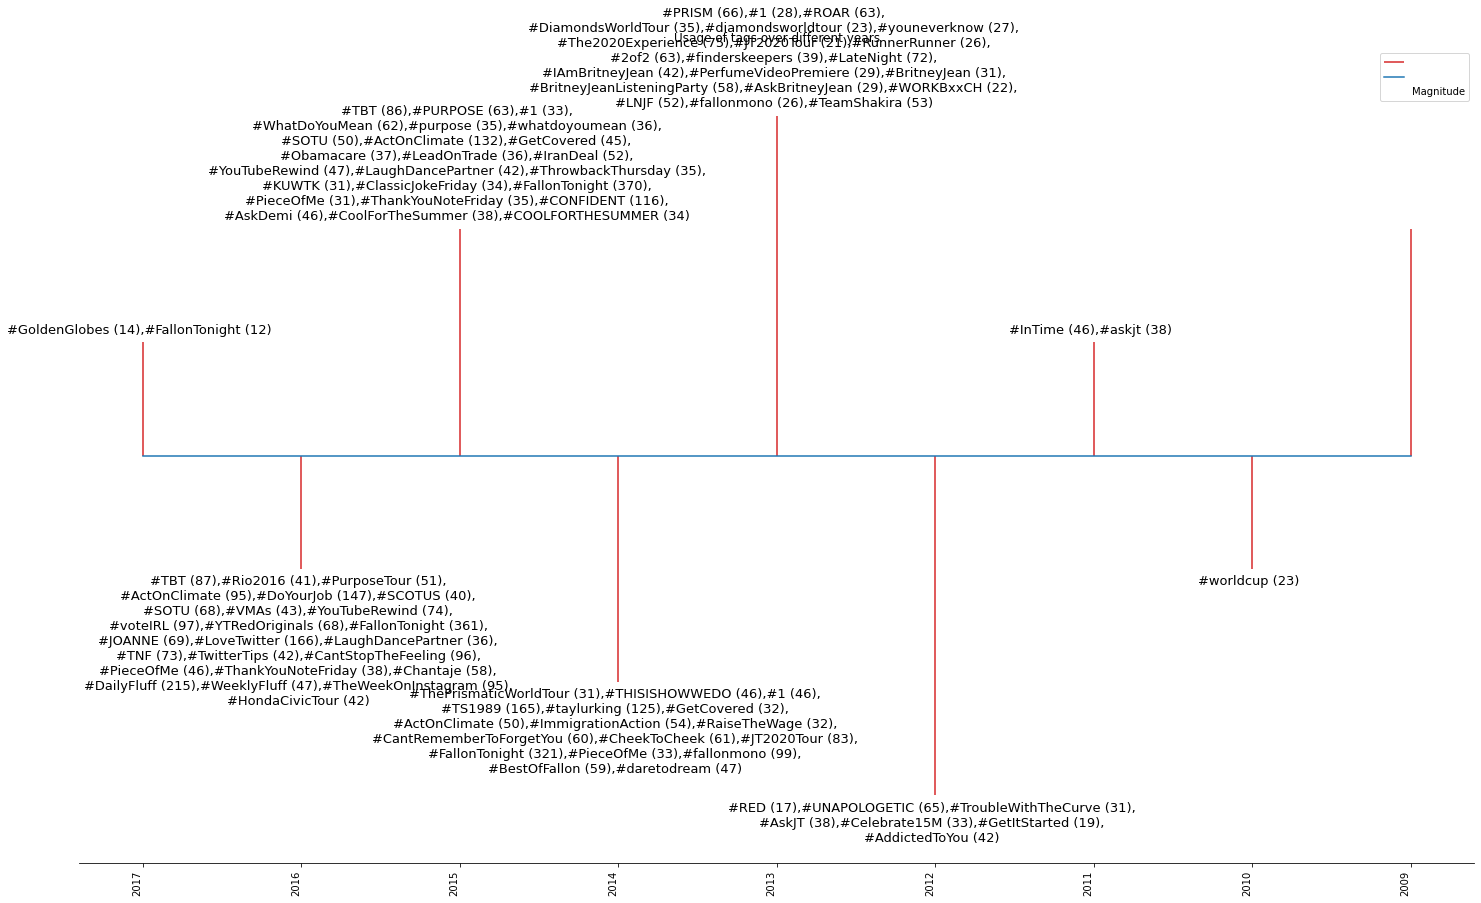

In [61]:
__draw_hashtag_timeline(df_temp)